<a href="https://colab.research.google.com/github/yousefhassan1999/Naive-Bayes-Classifier/blob/main/Naive%20Bayes%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the dataset into '/content/data'
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zj8pglnyHh_tNHZF2gRO-OXdt36ylSBM' -O "att-database-of-faces.zip"
! unzip att-database-of-faces.zip -d /content/data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score , ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from math import sqrt
from math import pi
from math import exp
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
X=[]
y=[]
#get the data set from /content/data/ folder
#store images in X Array & Labels in Y Array
for i in range(1,41):
	images = os.listdir('/content/data/s'+str(i))
	for image in images:

		img = cv2.imread('/content/data/s'+str(i)+"/"+image,0)
		img_col = np.array(img).flatten()
		subject = int(i)
		X.append(img_col)
		y.append(subject)
#Put the Images in Matrix in Size 400X10304
Matrix=np.reshape(X, (len(X), len(X[0])))

In [ ]:
#Create 2D Arrays of Train & Test Matrix 
#Create train & test Label Matrix
train_matrix=np.ndarray((len(X)//2, len(X[0])),dtype='int')
train_label=np.ndarray((len(X)//2,1),dtype='int')
test_matrix=np.ndarray((len(X)//2, len(X[0])),dtype='int')
test_label=np.ndarray((len(X)//2,1),dtype='int')
#Split the odd data as Training data And even as test data
for i in range(0,400):
  if(i%2==0):
    test_matrix[(i//2):]=Matrix[i]
    test_label[(i//2):]=y[i]
  else:
    train_matrix[(i//2):]=Matrix[i]
    train_label[(i//2):]=y[i]

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train_matrix, train_label).predict(test_matrix)
print("Number of mislabeled points out of a total %d points : %d"% (test_matrix.shape[0], (test_label != y_pred).sum()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of mislabeled points out of a total 200 points : 39000


In [ ]:
def Class_data(train_data):
    D_Classes = {}
    label = 1
    for i in range(0,len(train_data),5):
      D_Classes[label] = []
      for j in range (5):
        D_Classes[label].append(train_data[i+j])
      label = label +1
    return D_Classes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


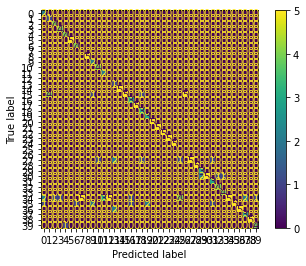

Accuracy = 0.715



In [ ]:
# Build In Naive Bayes .
classifier = GaussianNB()
classifier.fit(train_matrix, train_label)
y_pred = classifier.predict(test_matrix)
ac = accuracy_score(y_pred,test_label)
cm = confusion_matrix(y_pred, test_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print (f"Accuracy = {ac}")
print()


Fail Cases


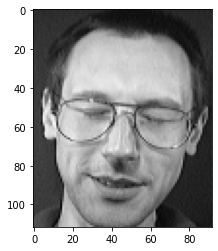

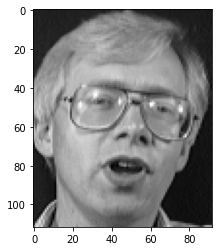

In [ ]:
print("\nFail Cases")

fail_img = test_matrix[test_label.ravel() != y_pred]
np.random.shuffle(fail_img)

for i in range(2):
  plt.imshow(fail_img[i].reshape((112, 92)), cmap='gray')
  plt.show()
  print()

In [ ]:
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

In [ ]:
from math import sqrt
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

In [ ]:
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	return summaries

In [ ]:
def summarize_by_class(dataset):
	separated = Class_data(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [ ]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
  if(stdev==0):
      return 0
  else:   
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return 10*(1 / (sqrt(2 * pi) * stdev)) * exponent

In [ ]:
def calculate_class_probabilities(summaries, row):
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, count = class_summaries[i]
      probabilities[class_value] *=calculate_probability(row[i], mean, stdev)
  return probabilities

In [ ]:
def Naive_Bayes(X_train,X_test):
  summary = summarize_by_class(X_train)
  predict = np.zeros(len(X_test))
  for i in range(len(X_test)):
    prob = -1
    probabilities = calculate_class_probabilities(summary, X_test[i])
    for classValue, instance in probabilities.items():
      if(prob < instance):
        prob = instance
        predict[i]= classValue
  return predict


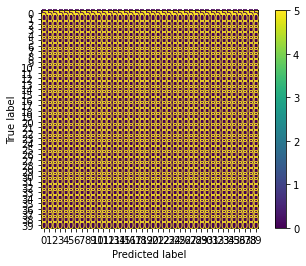

Accuracy = 0.025

Fail Cases


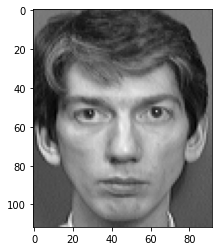

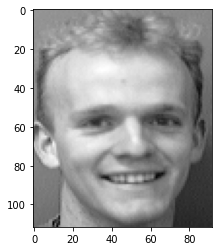

In [ ]:
predict = Naive_Bayes(train_matrix,test_matrix)
ac = accuracy_score(predict,test_label)
cm = confusion_matrix(predict, test_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print (f"Accuracy = {ac}")

print("\nFail Cases")

fail_img = test_matrix[test_label.ravel() != predict]
np.random.shuffle(fail_img)

for i in range(2):
  plt.imshow(fail_img[i].reshape((112, 92)), cmap='gray')
  plt.show()
  print()

In [ ]:
eigenvalues, eigenvectors = None, None # To avoid recalculating

def PCA(D, alpha, init = True):
  global eigenvalues, eigenvectors
  #This boolean to compute eigenvalues & eigenvectors once only
  if init:
    mean = np.mean(D, axis = 0) # compute the mean
    centered = D - mean         # Centralized Data Matrix 
    COV = np.cov(centered.T)    # Compute Covariance Matrix
    eigenvalues, eigenvectors = np.linalg.eigh(COV)  # Compute eigenvalues & eigenvectors

  total_sum, cum_sum, r = np.sum(eigenvalues), 0, 0  # Total Sum of eigenvalues

  U = eigenvectors[:, (eigenvectors.shape[1]-40):] # shape = n_attributes x r
  return U

In [ ]:
def pca_accuracy(alpha, train_data, train_label,
                 test_data, test_label, init=True):
  global U
  # PCA dimensionality  reduction
  U = PCA(train_data, alpha, init)
  train_reduced = train_data @ U
  test_reduced = test_data @ U
  return train_reduced,test_reduced

In [ ]:
#Compute Accuracy For Every Alpha Value
train_matrix_reduced , test_matrix_reduced = pca_accuracy(0.85, train_matrix,train_label, test_matrix, test_label, True)

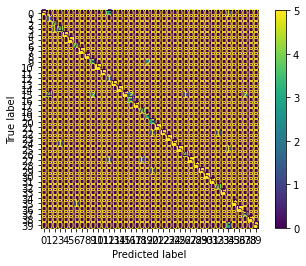

Accuracy = 0.855

Fail Cases


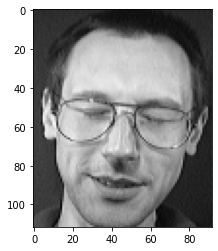

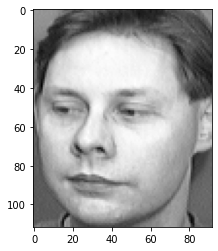


The Accuracy is much better than before as PCA reduces the noise


In [ ]:
predict2 = Naive_Bayes(train_matrix_reduced,test_matrix_reduced)
ac = accuracy_score(predict2,test_label)
cm = confusion_matrix(predict2, test_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print (f"Accuracy = {ac}")

print("\nFail Cases")

fail_img = test_matrix[test_label.ravel() != predict2]
np.random.shuffle(fail_img)

for i in range(2):
  plt.imshow(fail_img[i].reshape((112, 92)), cmap='gray')
  plt.show()
  print()
print("The Accuracy is much better than before as PCA reduces the noise")

In [ ]:
def fully_Baise_fit(data,label):
  labels = np.unique(label)
  P = []
  M = []
  Cov = []
  for i,l in enumerate(labels):
    class_data = data[label == l]
    M.append(class_data.mean(axis = 0))
    P.append(class_data.shape[0]/data.shape[0])
    Cov.append(np.cov(np.stack(class_data, axis = 1)))
  return P , M , Cov 

In [ ]:
def fully_Baise_predict(X_train ,Y_train,X_test):
  P,M,Cov = fully_Baise_fit(X_train,Y_train)
  Yhat = []
  for X in X_test:
    index = -1
    max = -math.inf
    for i in range(len(P)):
      result = P[i] * (1/(pow(np.sqrt(2*np.pi),X.shape[0])*np.sqrt(np.absolute(np.linalg.det(Cov[i])))))*np.exp(-np.dot(np.dot((X-M[i]).T,np.linalg.inv(Cov[i])),(X-M[i]))/2)
      if max < result:
        max = result
        index = i+1
    Yhat.append(index)
  return Yhat

In [ ]:
data = np.array([[2,6],[3,3],[3,5],[4,3],[4,4],[4,5],[5,3],[5,5],[6,2],[6,4],[6,6],[7,2],[7,3],[7,4],[7,5],[8,4],[9,2],[9,3],[10,1],[10,3],[10,5],[11,3],[11,4],[12,2],[13,4.5]])
labels = np.array([1,2,1,2,1,2,1,2,1,1,1,3,2,2,2,1,1,1,3,3,3,3,3,3,3])
Points23 = np.array(['out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out'])
Points46 = np.array(['out','in','out','in','in','out','in','out','in','in','out','out','out','out','out','out','out','out','out','out','out','out','out','out','out'])
Points69 = np.array(['in','in','in','in','in','in','in','in','in','in','in','in','in','in','in','in','in','in','out','out','out','out','out','out','out'])
test = np.array([[6,5],[9,4],[8,5]])
uniquelabel = np.unique(labels)
for i,l in enumerate(uniquelabel):
  cdata = data[labels == l]
  print(f'C{i+1}\n====\na- P(C{i+1}) = {cdata.shape[0]/data.shape[0]}\n')
  mean = cdata.mean(axis = 0)
  print(f'b- mean {mean}\n')
  cov_mat = np.cov(np.stack(cdata, axis = 1))
  print(f'b- covariance:\n{cov_mat}\n')
print(f'c - Full Bayes Classification {fully_Baise_predict(data,labels,test)}')
classifier = GaussianNB()
classifier.fit(data, labels)
print(f'd - Naive Bayes Classification {classifier.predict(test)}')
classifier.fit(data, Points23)
print(f'e - results for rec bounded by (2,3) {classifier.predict(test)}')
classifier.fit(data, Points46)
print(f'e - results for rec bounded by (2,3) {classifier.predict(test)}')
classifier.fit(data, Points69)
print(f'e - results for rec bounded by (2,3) {classifier.predict(test)}')

C1
====
a- P(C1) = 0.4

b- mean [5.8 3.9]

b- covariance:
[[ 5.73333333 -2.13333333]
 [-2.13333333  2.1       ]]

C2
====
a- P(C2) = 0.28

b- mean [5.28571429 4.        ]

b- covariance:
[[2.9047619  0.33333333]
 [0.33333333 1.        ]]

C3
====
a- P(C3) = 0.32

b- mean [10.5     3.0625]

b- covariance:
[[3.14285714 0.89285714]
 [0.89285714 1.88839286]]

c - Full Bayes Classification [2, 3, 2]
d - Naive Bayes Classification [2 3 1]
e - results for rec bounded by (2,3) ['out' 'out' 'out']
e - results for rec bounded by (2,3) ['out' 'out' 'out']
e - results for rec bounded by (2,3) ['in' 'in' 'in']
